# K-Beauty 성장과 해외 직접 판매 경로 분석

URL: https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

필요 라이브러리 호출
- 분석에 필요한 라이브러리
- 시각화에 필요한 라이브러리
- 시각화 폰트 및 깨짐현상 방지 코드

In [85]:
# 필요 라이브러리
import pandas as pd
import numpy as np

# 시각화 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

import os

if os.name =='posix':
    sns.set(font = 'AppleGothic')
elif os.name == 'nt':
    sns.set(font = 'Malgun Gothic')

데이터 로드하기

In [100]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [101]:
df = pd.read_csv('국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20210625095416.csv', encoding = 'cp949')
print(df.shape)
df

(450, 31)


,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,2015 4/4,2016 1/4,2016 2/4,2016 3/4,2016 4/4,2017 1/4,2017 2/4,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4,2020 3/4,2020 4/4
0,합계,합계,계,148272,153641,163999,213216,269101,271784,268421,450568,511395,494391,560853,726741,768504,574551,749612,858240,833672,897205,921586,974060,1251122,1345723,1526135,1881628,1529955,1284863,1650010,1517553
1,합계,합계,면세점,-,-,-,-,-,-,-,-,-,-,-,-,610257,441096,610630,677884,665613,725319,761836,770656,1070693,1157158,1336372,1655635,1297490,1051987,1410967,1247495
2,합계,합계,면세점 이외,-,-,-,-,-,-,-,-,-,-,-,-,158247,133455,138982,180356,168059,171886,159750,203404,180429,188565,189763,225993,232465,232876,239043,270058
3,합계,컴퓨터 및 주변기기,계,4915,4052,3912,3529,2903,2697,3804,4048,4211,3693,3160,3270,2610,2043,2018,2158,5236,3854,4320,4511,3702,4038,3670,3827,4142,3814,7716,3583
4,합계,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,-,-,-,-,-,5,3,5,1,2,6,1,215,2,0,1,70,113,0,3497,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,기타,생활용품 및 자동차용품,면세점,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
446,기타,생활용품 및 자동차용품,면세점 이외,-,-,-,-,-,-,-,-,-,-,-,-,656,596,567,634,665,469,504,589,465,488,308,531,384,334,353,391
447,기타,기 타,계,765,735,849,804,788,805,724,838,852,588,589,714,883,746,814,1101,1067,1063,1120,770,711,689,469,1094,939,710,826,870
448,기타,기 타,면세점,-,-,-,-,-,-,-,-,-,-,-,-,2,0,82,266,272,316,404,0,0,1,0,1,0,0,0,0


## 분석 시각화를 위한 TIDY DATA 작성
https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [93]:
df.melt(id_vars = ['국가(대륙)별','상품군별'])

,국가(대륙)별,상품군별,variable,value
0,합계,합계,판매유형별,계
1,합계,합계,판매유형별,면세점
2,합계,합계,판매유형별,면세점 이외
3,합계,컴퓨터 및 주변기기,판매유형별,계
4,합계,컴퓨터 및 주변기기,판매유형별,면세점
...,...,...,...,...
13045,기타,생활용품 및 자동차용품,2020 4/4,0
13046,기타,생활용품 및 자동차용품,2020 4/4,391
13047,기타,기 타,2020 4/4,870
13048,기타,기 타,2020 4/4,0


In [25]:
df = df.melt(id_vars = ['국가(대륙)별','상품군별','판매유형별'], var_name = '기간', value_name = '판매금액(백만원)')
print(df.shape)
df.head()

(12600, 5)


,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원)
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   국가(대륙)별    12600 non-null  object
 1   상품군별       12600 non-null  object
 2   판매유형별      12600 non-null  object
 3   기간         12600 non-null  object
 4   판매금액(백만원)  12600 non-null  object
dtypes: object(5)
memory usage: 492.3+ KB


# 데이터 전처리

1) 기간에서 연도를 분리하기

In [27]:
df['연도'] = df['기간'].map(lambda x: int(x.split()[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도
0,합계,합계,계,2014 1/4,148272,2014
1,합계,합계,면세점,2014 1/4,-,2014
2,합계,합계,면세점 이외,2014 1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014


2) 기간에서 분기를 분리하기

In [28]:
df['분기'] = df['기간'].map(lambda x: int(x.split()[1].split('/')[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1


3) 금액을 수치 데이터로 변경

In [29]:
df['판매금액(백만원)'] = df['판매금액(백만원)'].replace('-', np.nan).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   국가(대륙)별    12600 non-null  object 
 1   상품군별       12600 non-null  object 
 2   판매유형별      12600 non-null  object 
 3   기간         12600 non-null  object 
 4   판매금액(백만원)  9000 non-null   float64
 5   연도         12600 non-null  int64  
 6   분기         12600 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 689.2+ KB


4) 국가 대륙별 합계와 상품군별 합계는 따로 구할 수 있기 때문에 제거하는 것이 필요해요

In [31]:
print(df.shape)
df = df[(df['국가(대륙)별'] != '합계') & (df['상품군별'] != '합계')]
print(df.shape)
df.head()

(12600, 7)
(10584, 7)


,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1


# K-Beauty 시각화

Q1. 판매유형별 == '계' 데이터를 추출해보자.(df_total로 변수 저장)

In [32]:
df_total = df[df['판매유형별'] == '계']
print(df_total.shape)

(3528, 7)


Q2. 연도별, 판매액(백만원)에 대한 Line Plot을 그려보자.

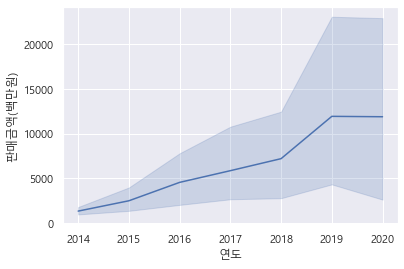

In [36]:
sns.lineplot(data = df_total, x = '연도', y = '판매금액(백만원)')
plt.show()

Q3. 상품군별 연도별, 판매액에 대한 Line Plot을 그려보자.

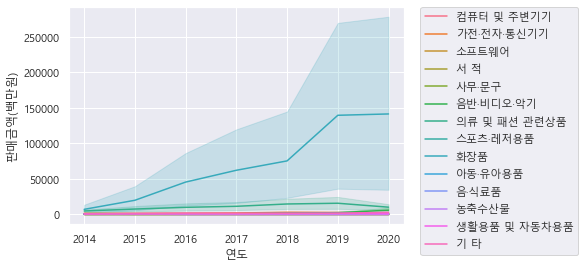

In [42]:
sns.lineplot(data = df_total, x = '연도', y = '판매금액(백만원)', hue = '상품군별')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.) # 1.05 밖에 표시
plt.show()

# 화장품의 온라인 쇼핑 직접 판매액

Q4. df_total 변수에서 상품군별 == '화장품' 데이터를 df_cosmetic 변수에 저장해보자.

In [43]:
df_cosmetic = df_total[df_total['상품군별'] ==  '화장품']

Q5. df_cosmetic의 연도별 판매액을 Line plot으로 표현해보자.(hue = 분기)

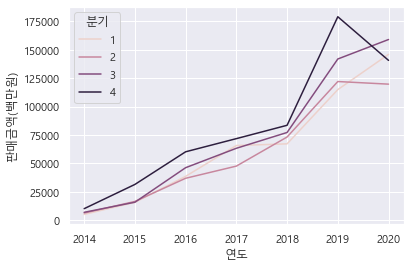

In [46]:
sns.lineplot(data = df_cosmetic, x ='연도', y = '판매금액(백만원)', hue = '분기', ci = None)
plt.show()

Q6. 화장품 판매액에 대한 기간별 금액 데이터 시각화

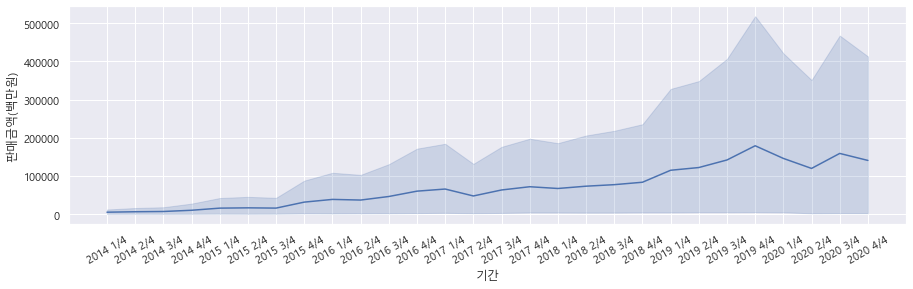

In [51]:
plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df_cosmetic, x = '기간', y = '판매금액(백만원)')
plt.show()

Q7. 국가 대륙별로 다른 색상으로 표현해보기.

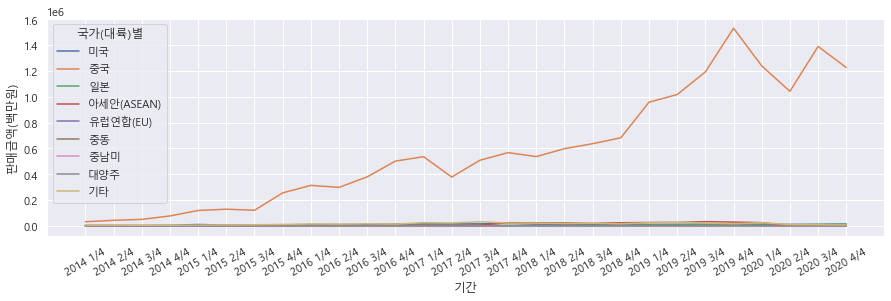

In [52]:
plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df_cosmetic, x = '기간', y = '판매금액(백만원)', hue = '국가(대륙)별')
plt.show()

Q8. 중국을 제외하고 국가별로 다른 색상으로 표현하기.

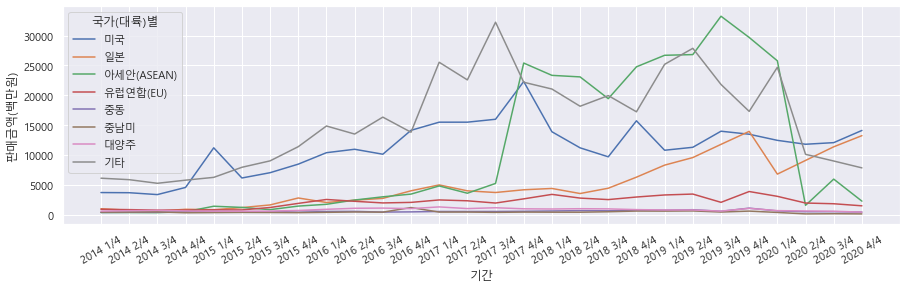

In [53]:
plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df_cosmetic[df_cosmetic['국가(대륙)별'] != '중국'], x = '기간', y = '판매금액(백만원)', hue = '국가(대륙)별')
plt.show()

Q9. 판매유형별 화장품 판매액에 대한 기간별 금액 데이터를 시각화하기(Line plot)

In [63]:
df_sub = df[(df['판매유형별'] != '계') & (df['상품군별'] == '화장품')]

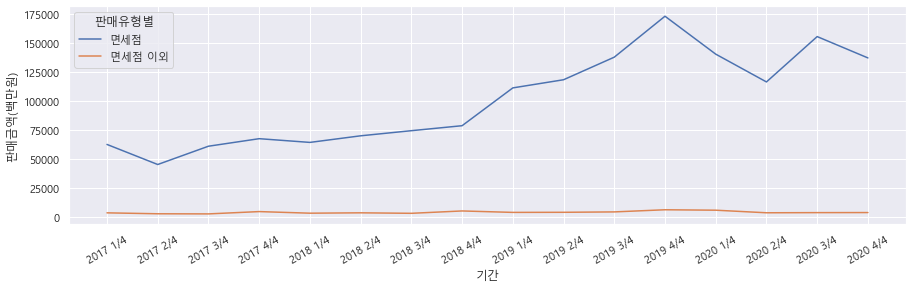

In [67]:
plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df_sub, x = '기간', y = '판매금액(백만원)', hue = '판매유형별', ci = None)
plt.show()

Q10. 면세점 이외의 데이터들도 증가 했는지 확인해보기

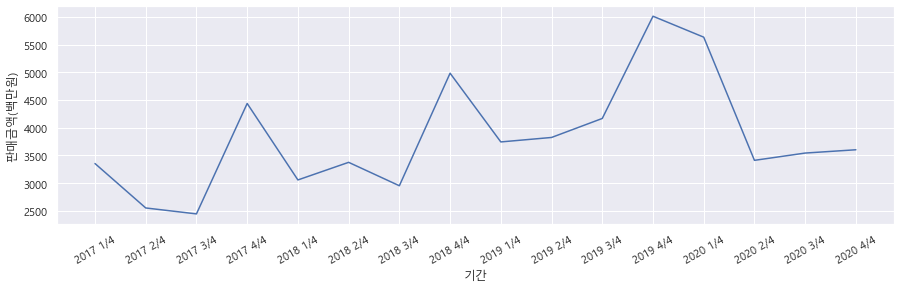

In [70]:
plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
df_sub2 = df_sub[df_sub['판매유형별'] == '면세점 이외']
sns.lineplot(data = df_sub2, x = '기간', y = '판매금액(백만원)', ci = None)
plt.show()

# 의류 및 패션관련 상품 온라인 쇼핑 해외 직접 판매액

Q11. df_fasion 변수에 의류 관련 상품만 따로 담아주자.(조건1: 상품군별 == '의류 및 패션 관련상품', 조건2: 판매유형별 == '계')

In [71]:
df_fashion = df[(df['상품군별'] == '의류 및 패션 관련상품') & (df['판매유형별'] == '계')]
print(df_fashion.shape)
df_fashion.head()

(252, 7)


,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도,분기
66,미국,의류 및 패션 관련상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014 1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014 1/4,1364.0,2014,1


Q12. 국가별 기간에 따른 금액 데이터 시각화

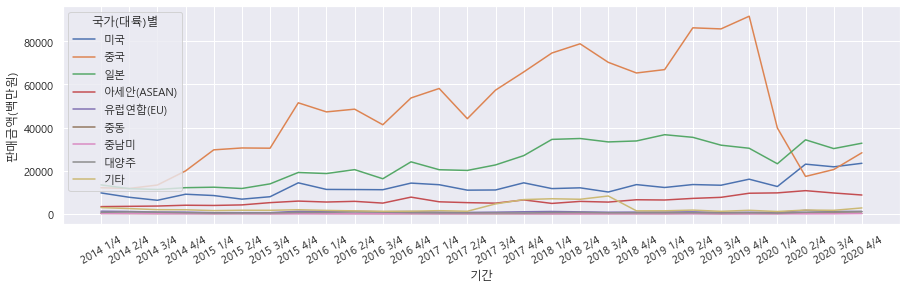

In [75]:
plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df_fashion, x = '기간', y = '판매금액(백만원)', hue = '국가(대륙)별')
plt.show()

Q13. 판매유형별 기간에 따른 금액 데이터 시각화

<AxesSubplot:xlabel='기간', ylabel='판매금액(백만원)'>

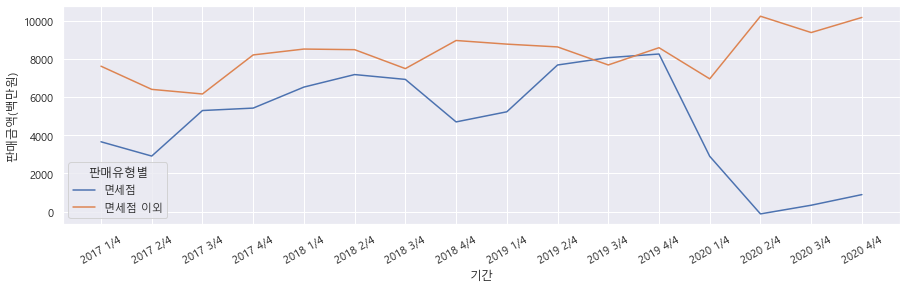

In [77]:
df_fashion2 = df[(df['상품군별'] == '의류 및 패션 관련상품') & (df['판매유형별'] != '계')]
plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df_fashion2, x = '기간', y = '판매금액(백만원)', hue = '판매유형별', ci = None)

Q14. 국가대륙별, 연도별 합계 금액을 Pivot_table을 통해 구하기

In [78]:
result = df_fashion.pivot_table(index = '국가(대륙)별', columns = '연도', values = '판매금액(백만원)', aggfunc = 'sum')
result

연도,2014,2015,2016,2017,2018,2019,2020
국가(대륙)별,,,,,,,
기타,9683.0,7248.0,5918.0,14387.0,23901.0,6475.0,7734.0
대양주,3392.0,2349.0,3401.0,2266.0,2725.0,2489.0,3686.0
미국,33223.0,38066.0,48451.0,50353.0,47875.0,55536.0,81297.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23068.0,31247.0,39313.0
유럽연합(EU),4485.0,3374.0,4899.0,3736.0,4114.0,3694.0,5045.0
일본,48960.0,57594.0,79905.0,90584.0,136800.0,134637.0,120817.0
중국,57531.0,142339.0,190932.0,225407.0,288848.0,330267.0,106318.0
중남미,975.0,616.0,649.0,762.0,576.0,544.0,611.0
중동,1172.0,1018.0,968.0,772.0,879.0,951.0,1767.0


Q15. Heatmap을 통해 연도별, 국가별 합계 금액을 시각적으로 표현하기

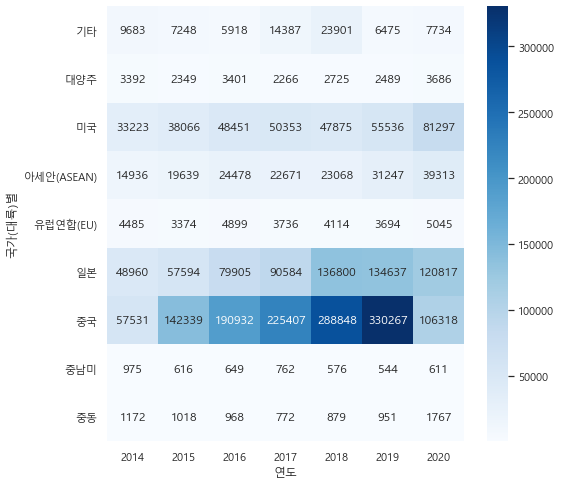

In [84]:
plt.figure(figsize = (8,8))
sns.heatmap(data = result, cmap = 'Blues', annot = True, fmt = '.0f')
plt.show()